In [1]:
import importlib
import utils.helper as helper
importlib.reload(helper)
from utils.helper import read_excel
from utils.helper import draw_hex_contour_plot, show_joint_plots, draw_heatmap
import matplotlib.pyplot as plt
from utils.helper import create_cross_validation

In [2]:
excel_file_path = "./Data_Collection_V3.xlsx"
sheet_page = "Sheet1"

In [3]:
# read excel and draw the hex contour

In [4]:
df = read_excel(excel_file_path, sheet_page)
df

,Data,Cement (kg/m3),Water (kg/m3),Fine Aggregate (kg/m3),Coarse Aggregate (kg/m3),HRWR (kg/m3),Fly ash (kg/m3),Slag (kg/m3),Silica Fume (kg/m3),nano-TiO2 (kg/m3),nano-SiO2 (kg/m3),Concrete Age (days),Curing Temperature (degC),Compressive Strength (Mpa)
0,0,200.0,180.0,774.0,1014.0,1.4,0.0,200.0,0,0.0,0.000,3,30.0,35.834
1,1,200.0,180.0,771.0,1014.0,1.7,0.0,192.0,8,0.0,0.000,3,30.0,37.017
2,2,200.0,180.0,771.0,1014.0,4.0,0.0,192.0,0,0.0,8.000,3,30.0,42.841
3,3,200.0,180.0,774.0,1014.0,1.4,0.0,200.0,0,0.0,0.000,7,30.0,47.391
4,4,200.0,180.0,771.0,1014.0,1.7,0.0,192.0,8,0.0,0.000,7,30.0,49.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,201,525.0,196.0,695.0,753.0,7.0,70.0,105.0,0,0.0,7.875,7,23.0,80.500
202,202,630.0,196.0,695.0,753.0,5.6,70.0,0.0,0,0.0,0.000,28,23.0,71.140
203,203,525.0,196.0,695.0,753.0,5.6,70.0,105.0,0,0.0,0.000,28,23.0,76.520
204,204,525.0,196.0,695.0,753.0,7.0,70.0,105.0,0,0.0,2.625,28,23.0,87.240


In [5]:
column_names = list(df.columns)
print(column_names)

['Data', 'Cement (kg/m3)', 'Water (kg/m3)', 'Fine Aggregate (kg/m3)', 'Coarse Aggregate (kg/m3)', 'HRWR (kg/m3)', 'Fly ash (kg/m3)', 'Slag (kg/m3)', 'Silica Fume (kg/m3)', 'nano-TiO2 (kg/m3)', 'nano-SiO2 (kg/m3)', 'Concrete Age (days)', 'Curing Temperature (degC)', 'Compressive Strength (Mpa)']


In [6]:
# draw hex contour for each components

In [7]:
save_paths = []
label = "Compressive Strength (Mpa)"
for feature in column_names[1:13]:
    sp = draw_hex_contour_plot(df, feature, label, "#4CB391")
    save_paths.append(sp)

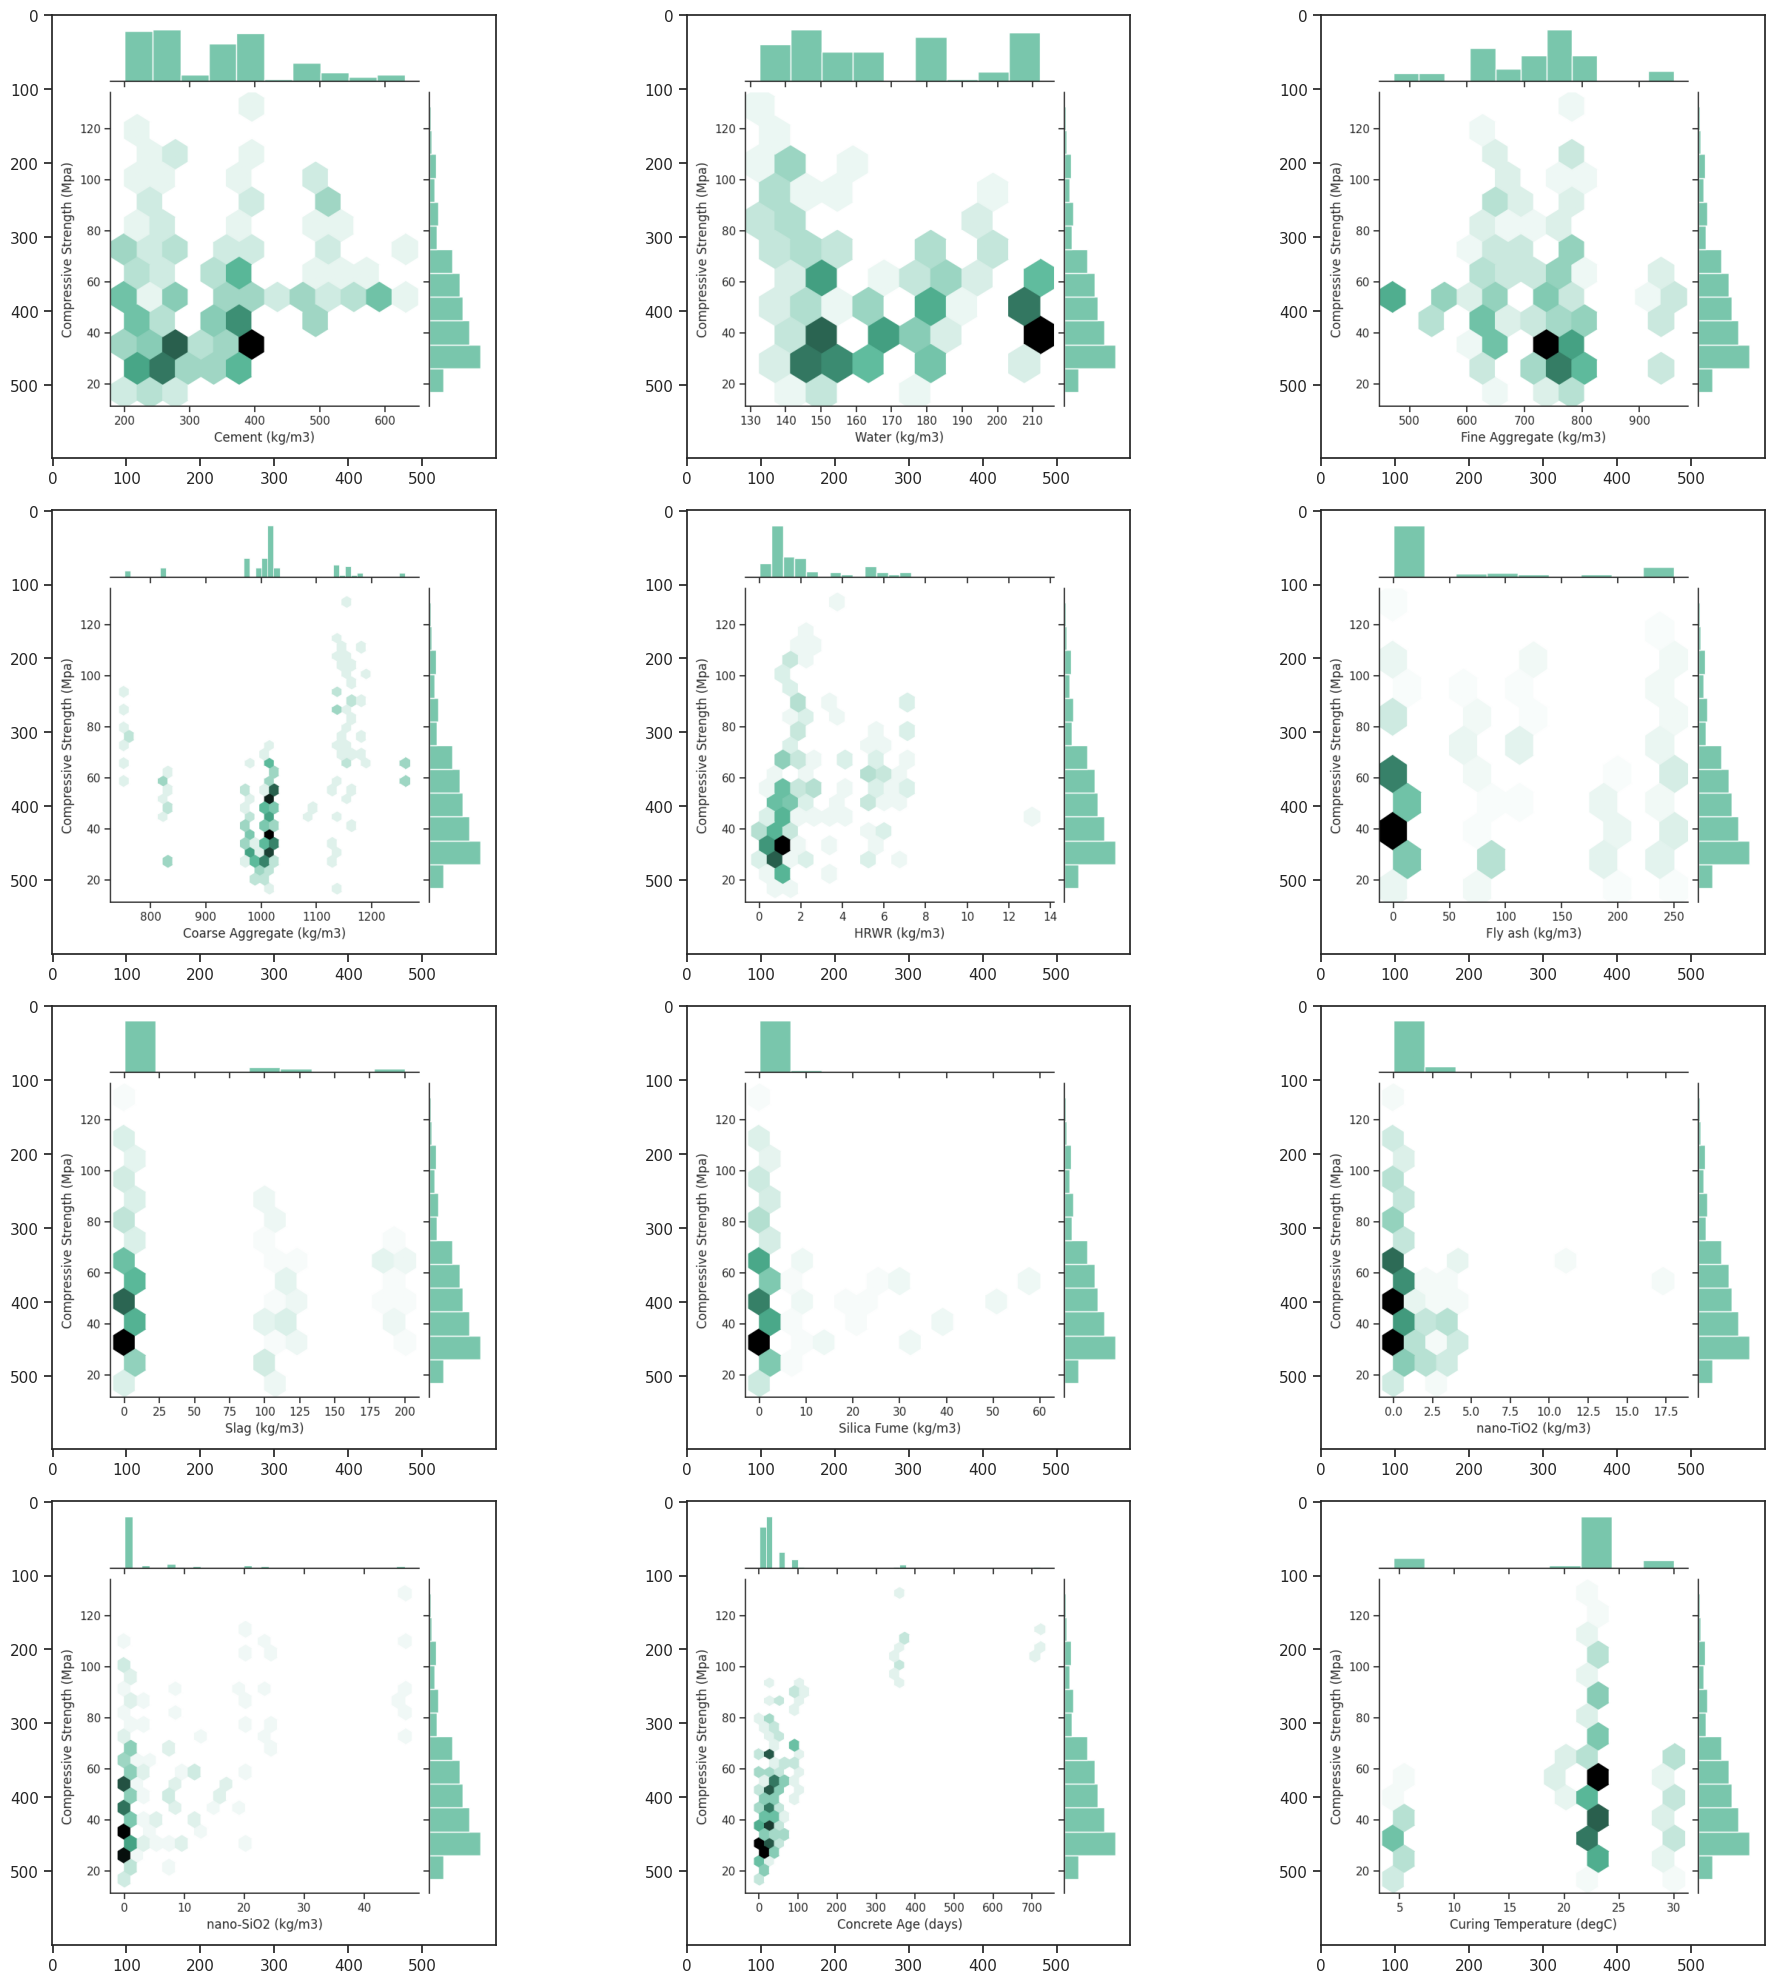

In [8]:
row = 4
col= 3
count = 0
fig, axs = plt.subplots(row,col, figsize=(20,20))
for i in range(row):
    for j in range(col):
        show_joint_plots(save_paths[count], axs[i][j])
        count += 1
plt.tight_layout()
plt.show()

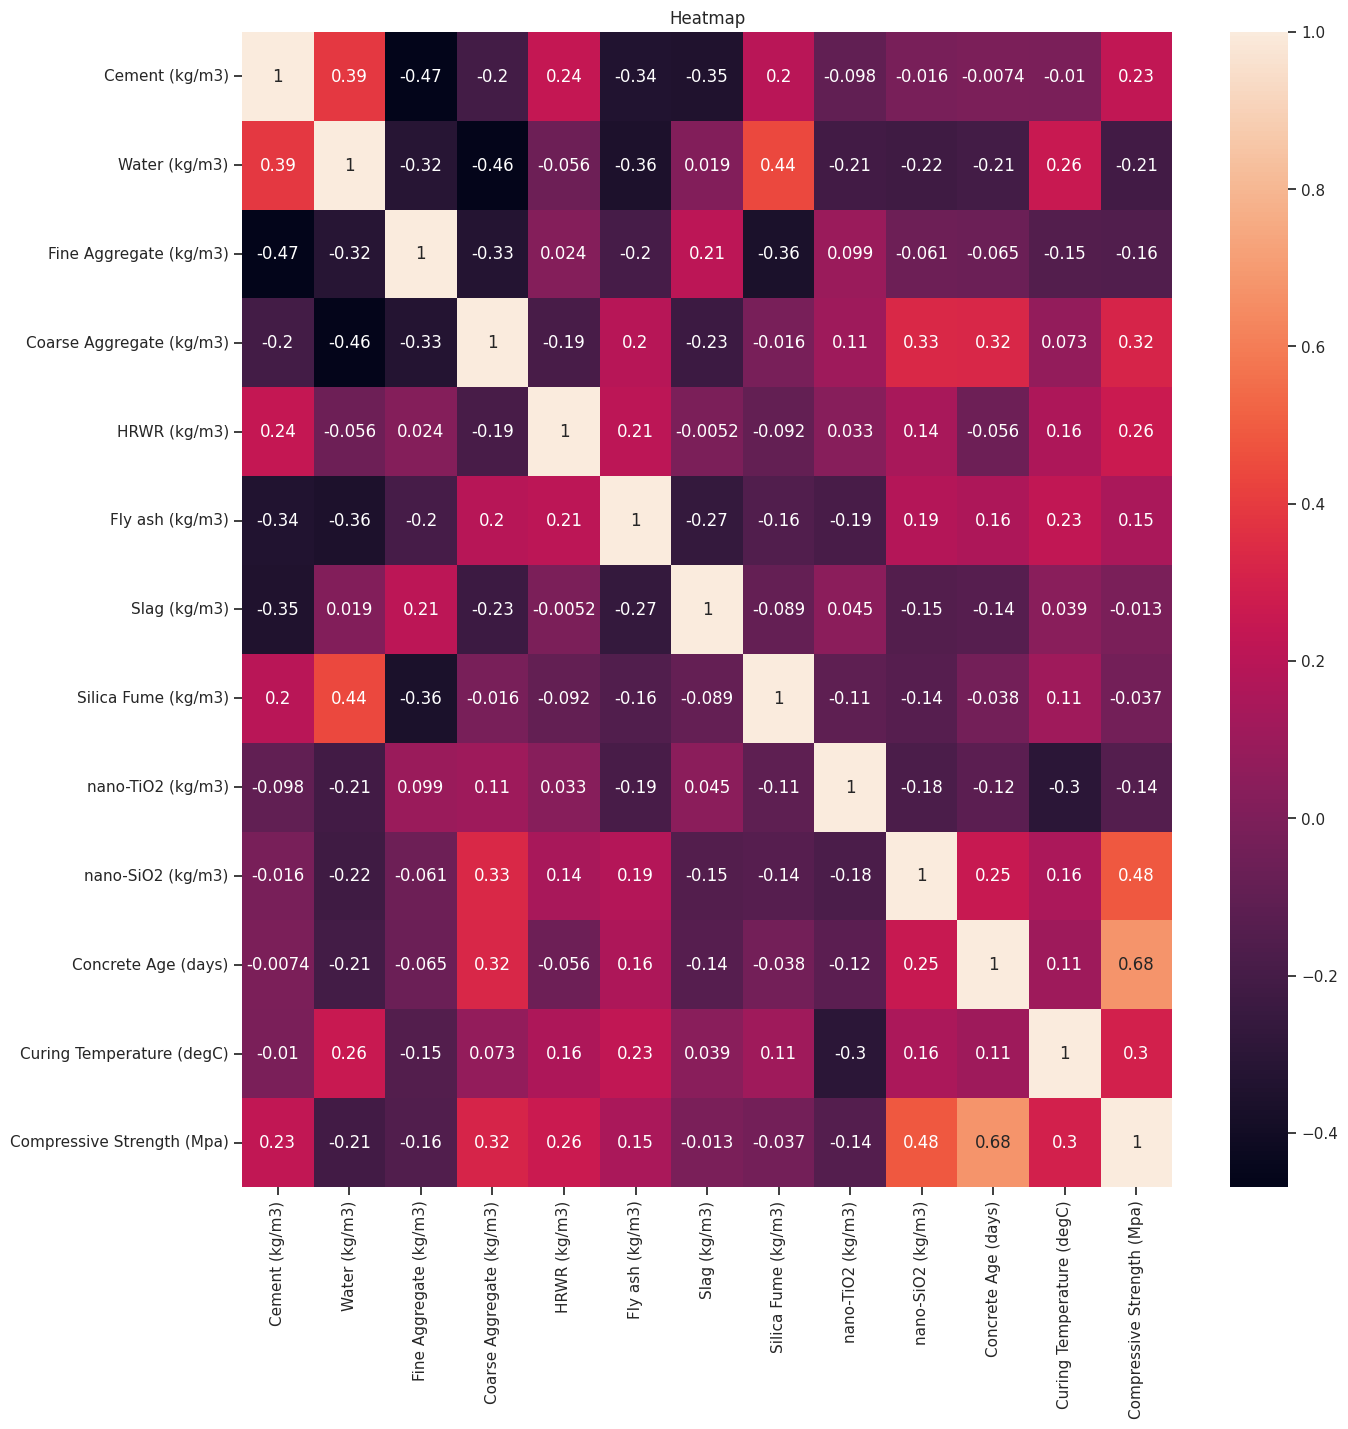

In [9]:
# heatmap
plt.figure(figsize=(15, 15))
draw_heatmap(df, drop_column=["Data"])
plt.title("Heatmap")
plt.show()

In [10]:
# split the data into 10 parts, use 9 parts as training, the rest 1 part as test
ten_fold_inputs = create_cross_validation(df, n_split=10)
print(len(ten_fold_inputs))

10


In [11]:
xtrain, ytrain, xtest, ytest = ten_fold_inputs[0]
print(ytrain)

[ 29.1         30.07281632  27.6         44.          30.829
  53.61        66.71       101.51       100.61        46.07555428
  28.19        26.81        32.74        38.725       28.645601
  38.321       26.749542    95.4         52.487       61.349
  42.1248568   58.8297      21.11652308  25.24648432  87.9
  47.5         50.03        41.149       51.2         43.205
  87.24        76.52        28.21        38.73263488  55.308
  31.83        22.7505812   35.1697      17.00724612  56.4
  31.86545392  61.21        37.28473528  56.51        43.9
  21.365       81.1         38.5003      85.7         64.38114208
  42.4695948   54.2797      32.2998238   59.632       58.22
  39.4359004   91.2         40.02        55.30763792 106.11
  40.5         46.0897      45.62050012  60.844       42.841
  49.45398668 104.5         31.83        56.4         28.86623332
  23.5434786   44.57        54.4        111.11        35.24388632
  50.849       32.8947      54.89395232  35.          68.321
  75.26  

In [12]:
# ridge_regression results
import utils.model
importlib.reload(utils.model)
from utils.model import RidgeRegressionModel
from utils.model import RandomForestModel
from utils.model import SVMRegressor
from utils.model import XGBregressor
from utils.model import ANNregressor

In [13]:
ridgeregression = RidgeRegressionModel(ten_fold_inputs)
ridgeregression.fit()
ridge_regression_results = ridgeregression.get_results()

In [14]:
print(ridge_regression_results.keys())

dict_keys(['RMSE', 'RMAE', 'R2'])


In [15]:
ridge_regression_results["R2"]

[0.8068246022851487,
 0.5753466823166016,
 0.8060055185410936,
 0.8289462572143399,
 0.8606138727469502,
 0.5454554281311976,
 0.8360417696336808,
 0.8019733779299635,
 0.7706079925043972,
 0.6085968022531261]

In [16]:
# RF regression results
RFregression = RandomForestModel(ten_fold_inputs)
RFregression.fit()
rf_regression_results = RFregression.get_results()

In [17]:
print(rf_regression_results.keys())

dict_keys(['RMSE', 'RMAE', 'R2'])


In [18]:
# svm regression results
SVMregression = SVMRegressor(ten_fold_inputs)
SVMregression.fit()
SVM_regression_results = SVMregression.get_results()

In [19]:
print(SVM_regression_results.keys())

dict_keys(['RMSE', 'RMAE', 'R2'])


In [20]:
# xgb regression results
XGBregression = XGBregressor(ten_fold_inputs)
XGBregression.fit()
XGB_regression_results = XGBregression.get_results()

In [21]:
print(XGB_regression_results.keys())

dict_keys(['RMSE', 'RMAE', 'R2'])


In [22]:
# NN regression results
ANNregression = ANNregressor(ten_fold_inputs)
ANNregression.fit()
ANN_regression_results = ANNregression.get_results()

In [23]:
print(ANN_regression_results.keys())

dict_keys(['RMSE', 'RMAE', 'R2'])


In [34]:
# build radar figure df
# labels = ["RMSE", "RMAE", "R2"]

# ridge_regression_results
# rf_regression_results
# SVM_regression_results
# XGB_regression_results
# ANN_regression_results
import numpy as np
import pandas as pd
df_values = np.zeros((5,3))

def sumary_results(results):
    rmse_mean = np.array(results["RMSE"]).mean()
    rmae_mean = np.array(results["RMAE"]).mean()
    r2_mean = np.array(results["R2"]).mean()
    return np.array([rmse_mean, rmae_mean, r2_mean])

# def draw_boxplot(ridge_regression_results, rf_regression_results, SVM_regression_results, XGB_regression_results, ANN_regression_results):
    

df_values[0] = sumary_results(ridge_regression_results)
df_values[1] = sumary_results(rf_regression_results)
df_values[2] = sumary_results(SVM_regression_results)
df_values[3] = sumary_results(XGB_regression_results)
df_values[4] = sumary_results(ANN_regression_results)

df = pd.DataFrame(df_values, index=['ridge', 'rf', 'svm', 'xgb', 'ann'], columns=['RMSE', 'RMAE', 'R2'])



In [35]:
df

,RMSE,RMAE,R2
ridge,9.626720,2.690585,0.744041
rf,6.071267,2.148835,0.896934
svm,19.921739,3.911347,0.010679
xgb,5.676903,2.016189,0.913503
ann,3.530872,1.584272,0.962949


In [36]:
df.to_csv("radar_plot_data.csv")

In [ ]:
# radar figure

In [26]:
ridge_pred = ridgeregression.get_predictions()
rf_pred = RFregression.get_predictions()
svm_pred = SVMregression.get_predictions()
xgb_pred = XGBregression.get_predictions()
ann_pred = ANNregression.get_predictions()


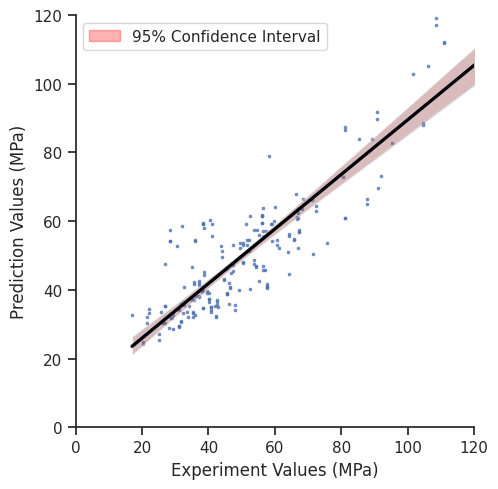

In [27]:
# relation between pred and gt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# fig, axs = plt.subplots(3,2, figsize=(10,10))

def draw_relation_plot(outputs, ax, title=None):
    gts = []
    preds = []
    for (gt, pred) in outputs:
        gts.extend(gt.tolist())
        preds.extend(pred.tolist())
        
    gts = np.array(gts)
    preds = np.array(preds)
    
    df_values = np.stack([gts, preds], axis=1)
    df = pd.DataFrame(df_values, columns=["Experiment Values (MPa)", "Prediction Values (MPa)"])
    plot = sns.lmplot(data=df, x="Experiment Values (MPa)", y="Prediction Values (MPa)", legend=True, markers=['x'], scatter_kws={"s":3})
#     plt.legend(['95% Confidence Interval'], loc='upper left', frameon=True)

    
    ax = plot.axes[0, 0]  # Get the axis from lmplot
    sns.regplot(x="Experiment Values (MPa)", y="Prediction Values (MPa)", data=df, scatter=False, ci=95, line_kws={'color':'black'}, 
            ax=ax, 
            scatter_kws={'s': 3}, 
            fit_reg=True)
    ax.collections[1].set_facecolor("#FF8C94")
    ax.collections[1].set_alpha(0.3)  # Adjust transparency if needed
    
    red_patch = mpatches.Patch(color="red", alpha=0.3, label="95% Confidence Interval")
    plt.legend(handles=[red_patch], loc='upper left', frameon=True)

    plt.tight_layout()
    plt.xlim(0, 120)
    plt.ylim(0, 120)
draw_relation_plot(ridge_pred, axs[0,0], title="ridge")


# plt.tight_layout()
# plt.show()



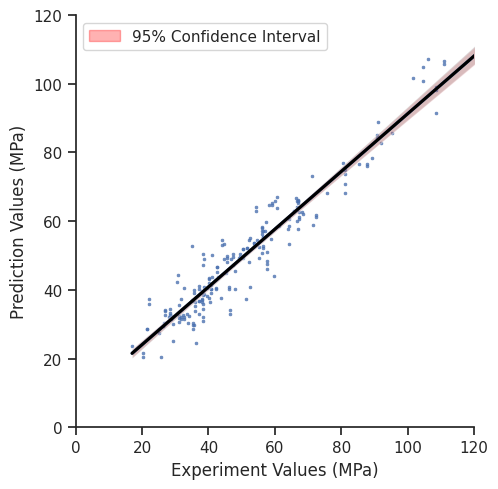

In [28]:
draw_relation_plot(rf_pred, axs[0,1], title='random forest')

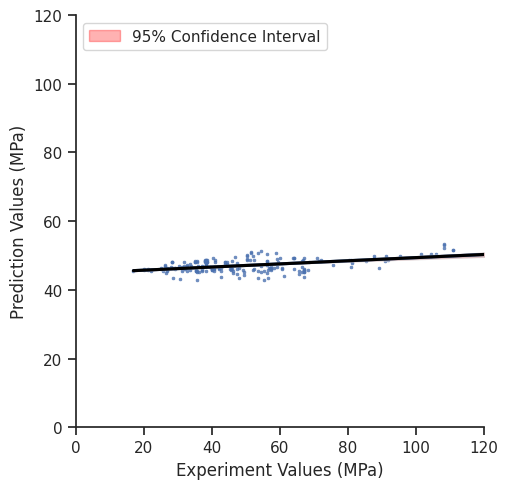

In [29]:
draw_relation_plot(svm_pred, axs[1,0], title='svm')


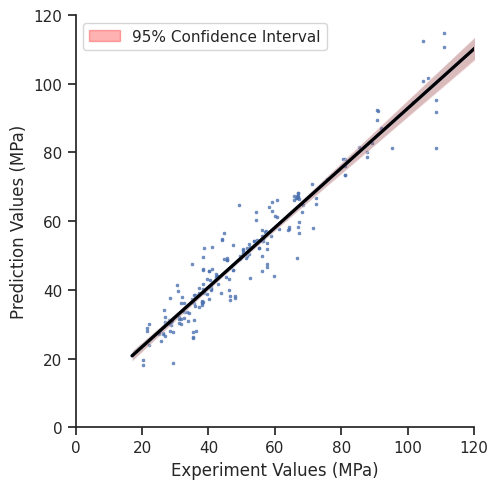

In [30]:
draw_relation_plot(xgb_pred, axs[1,1], title='xgboost')


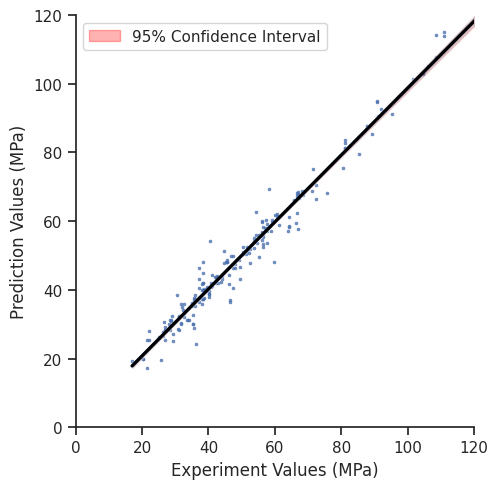

In [31]:
draw_relation_plot(ann_pred, axs[2,0], title='ann')

In [32]:
# box plot
